In [1]:
import requests
import pandas as pd
import seaborn as sns

In [2]:
def cumsum_by_traj(df):
    df["cum_dist"] = df['delta_dist'].cumsum(axis=0)
    df["cum_time"] = df['delta_time'].cumsum(axis=0)
    df=df[df["speed"] <100]
    df["speed"] = df["speed"] / 3.6
    df["cum_dist"] = df["cum_dist"]
    df["cum_time"] = df["cum_time"] / 60
    return df

In [3]:
def df_journey(journey):
    #s_query = db.query(dm.trajectory_id).filter(dm.journey_id == journey).subquery()
    #q = db.query(dp).filter(dp.trajectory_id.in_(s_query))

    #df = pd.read_sql(q.statement, q.session.bind)

    #df = df.sort_values("instant")
    url = f"http://localhost/api/v1/dublin_points/points/?journey_id={journey}"
    r = requests.get(url).json()
    df = pd.DataFrame(r)
    df = df.sort_values("instant")
    df = pd.concat(
        [cumsum_by_traj(_df) for _, _df in df.groupby("trajectory_id")]
    )
    return df

/tmp/ipykernel_24525/608530476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["speed"] = df["speed"] / 3.6
/tmp/ipykernel_24525/608530476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cum_dist"] = df["cum_dist"]
/tmp/ipykernel_24525/608530476.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

<AxesSubplot:xlabel='cum_dist', ylabel='cum_time'>

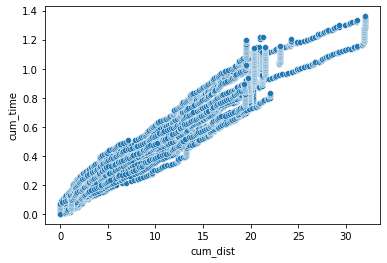

In [4]:
df = df_journey("00070001")
sns.scatterplot(x=df["cum_dist"]/1000, y=df["cum_time"]/60)

/tmp/ipykernel_24525/608530476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["speed"] = df["speed"] / 3.6
/tmp/ipykernel_24525/608530476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cum_dist"] = df["cum_dist"]
/tmp/ipykernel_24525/608530476.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

<AxesSubplot:xlabel='cum_dist', ylabel='cum_time'>

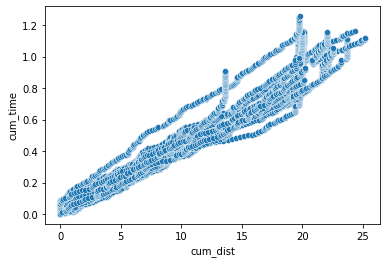

In [5]:
df = df_journey("00071001")
sns.scatterplot(x=df["cum_dist"]/1000, y=df["cum_time"]/60)

/tmp/ipykernel_24525/608530476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["speed"] = df["speed"] / 3.6
/tmp/ipykernel_24525/608530476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cum_dist"] = df["cum_dist"]
/tmp/ipykernel_24525/608530476.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

<AxesSubplot:xlabel='hour', ylabel='cum_time'>

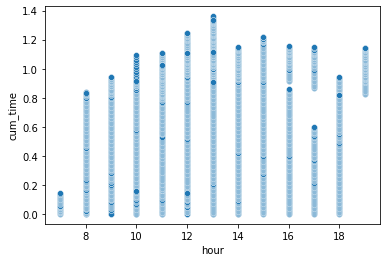

In [6]:
df = df_journey("00070001")
sns.scatterplot(data=df, x=df["hour"], y=df["cum_time"]/60)

/tmp/ipykernel_24525/608530476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["speed"] = df["speed"] / 3.6
/tmp/ipykernel_24525/608530476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cum_dist"] = df["cum_dist"]
/tmp/ipykernel_24525/608530476.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

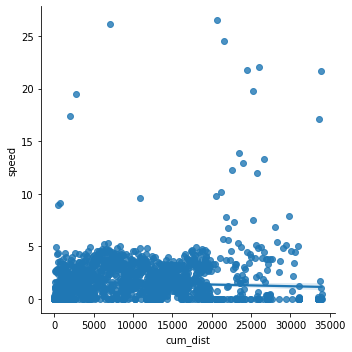

In [7]:
df = df_journey("00070002")
sns.lmplot(data=df, x="cum_dist", y="speed")


In [10]:
import plotly

ModuleNotFoundError: No module named 'plotly'

In [8]:
from scipy.optimize import curve_fit

In [9]:
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

ModuleNotFoundError: No module named 'keplergl'